In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams['font.size'] = 12          # Base font size
plt.rcParams['axes.titlesize'] = 20     # Axes title
plt.rcParams['axes.labelsize'] = 15     # X and Y labels
plt.rcParams['xtick.labelsize'] = 13    # X tick labels
plt.rcParams['ytick.labelsize'] = 13    # Y tick labels
plt.rcParams['legend.fontsize'] = 13    # Legend
plt.rcParams['figure.titlesize'] = 30   # Figure title (suptitle)

In [2]:
# Calculate KL Divergence
def calculate_kl_divergence(p, q):
    """Calculate KL divergence between two probability distributions"""
    kl = 0
    for i in range(len(p)):
        if p[i] > 0 and q[i] > 0:
            kl += p[i] * np.log(p[i] / q[i])
    return kl

# Data
categories = ['Seizure', 'LPD', 'GPD', 'LRDA', 'GRDA', 'Other']

# Good prediction example (low KL divergence)
actual_low = np.array([0.60, 0.15, 0.10, 0.05, 0.05, 0.05])
predicted_low = np.array([0.58, 0.16, 0.11, 0.06, 0.05, 0.04])

# Poor prediction example (high KL divergence)
actual_high = np.array([0.60, 0.15, 0.10, 0.05, 0.05, 0.05])
predicted_high = np.array([0.10, 0.30, 0.25, 0.15, 0.10, 0.10])

# Calculate KL divergences
kl_low = calculate_kl_divergence(actual_low, predicted_low)
kl_high = calculate_kl_divergence(actual_high, predicted_high)

print(f"Good prediction KL Divergence: {kl_low:.4f}")
print(f"Poor prediction KL Divergence: {kl_high:.4f}")

Good prediction KL Divergence: 0.0032
Poor prediction KL Divergence: 0.7552


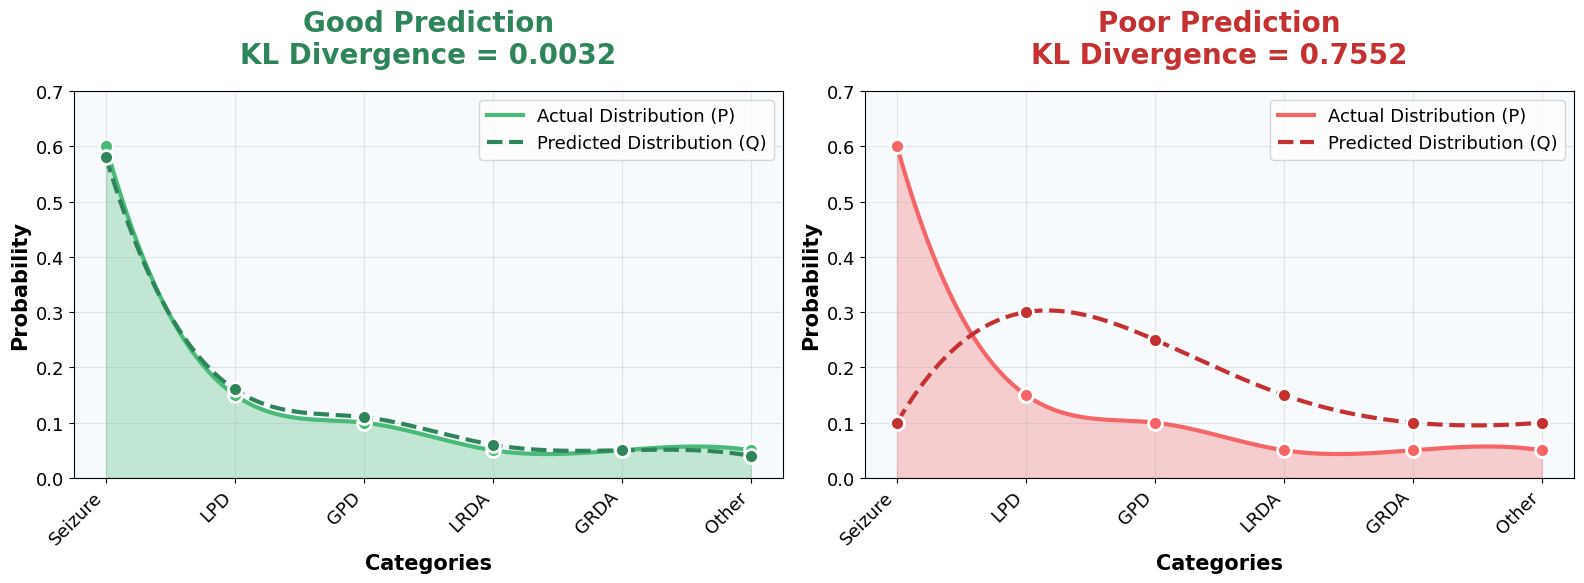

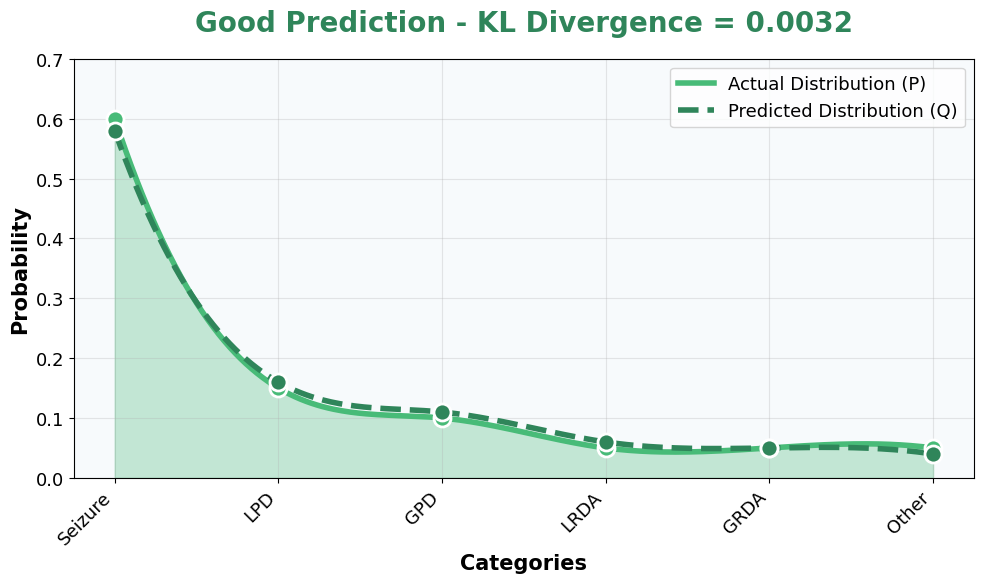

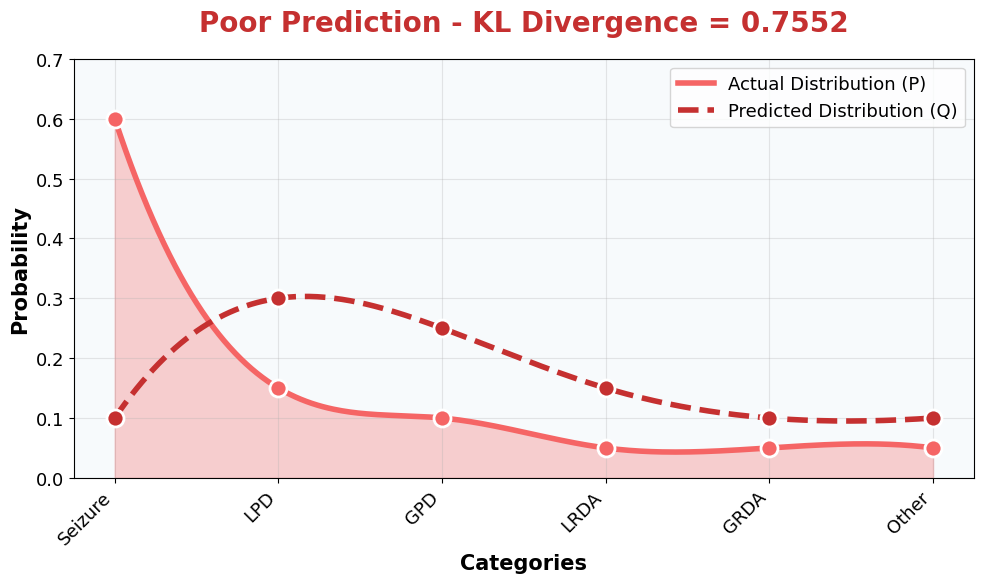

In [3]:
# Create smooth curves using spline interpolation
def create_smooth_curve(values, num_points=300):
    """Create smooth interpolated curve"""
    x = np.arange(len(values))
    x_smooth = np.linspace(0, len(values) - 1, num_points)
    
    # Use cubic spline interpolation
    spl = make_interp_spline(x, values, k=3)
    y_smooth = spl(x_smooth)
    
    # Ensure non-negative values
    y_smooth = np.maximum(y_smooth, 0)
    
    return x_smooth, y_smooth

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Good Prediction (Low KL)
x_smooth_low_actual, y_smooth_low_actual = create_smooth_curve(actual_low)
x_smooth_low_pred, y_smooth_low_pred = create_smooth_curve(predicted_low)

ax1.plot(x_smooth_low_actual, y_smooth_low_actual, 
         label='Actual Distribution (P)', color='#48bb78', linewidth=3)
ax1.fill_between(x_smooth_low_actual, y_smooth_low_actual, alpha=0.3, color='#48bb78')
ax1.scatter(range(len(actual_low)), actual_low, color='#48bb78', s=100, zorder=5, edgecolors='white', linewidth=2)

ax1.plot(x_smooth_low_pred, y_smooth_low_pred, 
         label='Predicted Distribution (Q)', color='#2f855a', linewidth=3, linestyle='--')
ax1.scatter(range(len(predicted_low)), predicted_low, color='#2f855a', s=100, zorder=5, edgecolors='white', linewidth=2)

ax1.set_xlabel('Categories', fontweight='bold')
ax1.set_ylabel('Probability', fontweight='bold')
ax1.set_title(f'Good Prediction\nKL Divergence = {kl_low:.4f}', 
              fontweight='bold', color='#2f855a', pad=20)
ax1.set_xticks(range(len(categories)))
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.set_ylim(0, 0.7)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#f7fafc')

# Plot 2: Poor Prediction (High KL)
x_smooth_high_actual, y_smooth_high_actual = create_smooth_curve(actual_high)
x_smooth_high_pred, y_smooth_high_pred = create_smooth_curve(predicted_high)

ax2.plot(x_smooth_high_actual, y_smooth_high_actual, 
         label='Actual Distribution (P)', color='#f56565', linewidth=3)
ax2.fill_between(x_smooth_high_actual, y_smooth_high_actual, alpha=0.3, color='#f56565')
ax2.scatter(range(len(actual_high)), actual_high, color='#f56565', s=100, zorder=5, edgecolors='white', linewidth=2)

ax2.plot(x_smooth_high_pred, y_smooth_high_pred, 
         label='Predicted Distribution (Q)', color='#c53030', linewidth=3, linestyle='--')
ax2.scatter(range(len(predicted_high)), predicted_high, color='#c53030', s=100, zorder=5, edgecolors='white', linewidth=2)

ax2.set_xlabel('Categories', fontweight='bold')
ax2.set_ylabel('Probability', fontweight='bold')
ax2.set_title(f'Poor Prediction\nKL Divergence = {kl_high:.4f}', 
              fontweight='bold', color='#c53030', pad=20)
ax2.set_xticks(range(len(categories)))
ax2.set_xticklabels(categories, rotation=45, ha='right')
ax2.set_ylim(0, 0.7)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#f7fafc')

plt.tight_layout()
plt.savefig('kl_divergence_comparison.svg', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Create individual plots with larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Good prediction plot
x_smooth_low_actual, y_smooth_low_actual = create_smooth_curve(actual_low)
x_smooth_low_pred, y_smooth_low_pred = create_smooth_curve(predicted_low)

ax.plot(x_smooth_low_actual, y_smooth_low_actual, 
        label='Actual Distribution (P)', color='#48bb78', linewidth=4)
ax.fill_between(x_smooth_low_actual, y_smooth_low_actual, alpha=0.3, color='#48bb78')
ax.scatter(range(len(actual_low)), actual_low, color='#48bb78', s=150, zorder=5, edgecolors='white', linewidth=2)

ax.plot(x_smooth_low_pred, y_smooth_low_pred, 
        label='Predicted Distribution (Q)', color='#2f855a', linewidth=4, linestyle='--')
ax.scatter(range(len(predicted_low)), predicted_low, color='#2f855a', s=150, zorder=5, edgecolors='white', linewidth=2)

ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('Probability', fontweight='bold')
ax.set_title(f'Good Prediction - KL Divergence = {kl_low:.4f}', 
             fontweight='bold', color='#2f855a', pad=20)
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylim(0, 0.7)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_facecolor('#f7fafc')

plt.tight_layout()
plt.savefig('kl_divergence_good.svg', dpi=300, bbox_inches='tight')
plt.show()

# Poor prediction plot
fig, ax = plt.subplots(figsize=(10, 6))

x_smooth_high_actual, y_smooth_high_actual = create_smooth_curve(actual_high)
x_smooth_high_pred, y_smooth_high_pred = create_smooth_curve(predicted_high)

ax.plot(x_smooth_high_actual, y_smooth_high_actual, 
        label='Actual Distribution (P)', color='#f56565', linewidth=4)
ax.fill_between(x_smooth_high_actual, y_smooth_high_actual, alpha=0.3, color='#f56565')
ax.scatter(range(len(actual_high)), actual_high, color='#f56565', s=150, zorder=5, edgecolors='white', linewidth=2)

ax.plot(x_smooth_high_pred, y_smooth_high_pred, 
        label='Predicted Distribution (Q)', color='#c53030', linewidth=4, linestyle='--')
ax.scatter(range(len(predicted_high)), predicted_high, color='#c53030', s=150, zorder=5, edgecolors='white', linewidth=2)

ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('Probability', fontweight='bold')
ax.set_title(f'Poor Prediction - KL Divergence = {kl_high:.4f}', 
             fontweight='bold', color='#c53030', pad=20)
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylim(0, 0.7)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_facecolor('#f7fafc')

plt.tight_layout()
plt.savefig('kl_divergence_poor.svg', dpi=300, bbox_inches='tight')
plt.show()